In [161]:
# Import libraries
import pandas as pd

# Import csv files, put in dataframe
df_2018 = pd.read_csv('delays_2018.csv')
df_2019 = pd.read_csv('delays_2019.csv')

# Note: Put file path if csv is in different folder than notebook
# Example: df_2018 = pd.read_csv('C:\Users\User\Downloads\delays_2018.csv')

### Explore the Data

In [162]:
df_2018.columns.tolist()

['date',
 'carrier',
 'carrier_name',
 'airport',
 'airport_name',
 'arr_flights',
 'arr_del15',
 'carrier_ct',
 'weather_ct',
 'nas_ct',
 'security_ct',
 'late_aircraft_ct',
 'arr_cancelled',
 'arr_diverted',
 'arr_delay',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay']

### Description of Each Column
![Description of each column](data_description.png)

In [163]:
# Descriptive Stats of the dataset
df_2018.describe()

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,20214.000000,20211.000000,20214.000000,20214.000000,20214.000000,20214.000000,20214.000000,20214.000000,20214.000000,20214.000000,20214.000000,20214.000000,20214.000000,20214.000000,20214.000000
mean,356.853963,66.929395,18.476170,2.345306,21.706033,0.124602,24.267386,5.767488,0.883497,4330.665875,1301.918522,243.349906,1063.047146,6.259573,1716.090729
std,990.874517,178.046583,43.700258,6.826754,68.707769,0.542946,69.326508,23.290113,3.691290,12354.396793,3484.188033,809.839775,3934.392635,37.914728,4984.023011
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,7.000000,2.200000,0.000000,1.520000,0.000000,1.960000,0.000000,0.000000,401.000000,116.000000,0.000000,53.000000,0.000000,105.000000
50%,98.000000,19.000000,6.085000,0.660000,4.630000,0.000000,6.040000,1.000000,0.000000,1148.000000,373.000000,30.000000,178.000000,0.000000,407.000000
75%,242.000000,47.000000,15.090000,2.000000,12.967500,0.000000,16.250000,4.000000,1.000000,2990.750000,1040.750000,178.000000,537.000000,0.000000,1192.750000
max,21931.000000,4176.000000,1026.090000,188.680000,1884.420000,18.970000,1443.450000,1286.000000,143.000000,370937.000000,108068.000000,28294.000000,112018.000000,2897.000000,131666.000000


In [164]:
# Inspect the first 3 rows of the dataframe. Default is 5
df_2018.head(n=3)

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-1,MQ,Envoy Air,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",5.0,3.0,1.00,0.06,1.94,0.0,0.00,0.0,0.0,104.0,54.0,1.0,49.0,0.0,0.0
1,2018-1,MQ,Envoy Air,BNA,"Nashville, TN: Nashville International",110.0,21.0,7.17,1.16,6.76,0.0,5.92,3.0,0.0,897.0,344.0,37.0,226.0,0.0,290.0
2,2018-1,MQ,Envoy Air,BOI,"Boise, ID: Boise Air Terminal",32.0,8.0,0.22,0.35,5.61,0.0,1.82,0.0,0.0,353.0,9.0,18.0,233.0,0.0,93.0


In [165]:
# Inspect the last row of the dataframe. Default is 5
df_2019.tail(n=1)

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
20945,2019-1,MQ,Envoy Air,SAT,"San Antonio, TX: San Antonio International",26.0,4.0,1.16,0.64,1.92,0.0,0.29,5.0,0.0,120.0,50.0,14.0,41.0,0.0,15.0


In [166]:
# Combine the 2 dataframes. First parameter is a list of the dataframes, second parameter is to
# ignore existing indexes
df = pd.concat([df_2018, df_2019], ignore_index=True)

In [167]:
print("Rows in 2018 df:", str(len(df_2018)))
print("Rows in 2019 df:", str(len(df_2019)))
print("Rows in combined df:", str(len(df)))

#Alternative method to print # of rows and columns:
df.shape

Rows in 2018 df: 20231
Rows in 2019 df: 20946
Rows in combined df: 41177


(41177, 20)

In [168]:
# Non-null count and data type for each column. 
df.info()

# Notice how the count doesn't equal 41177 for each column.
# This means there are null values that we need to take care of

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41177 entries, 0 to 41176
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 41177 non-null  object 
 1   carrier              41147 non-null  object 
 2   carrier_name         41147 non-null  object 
 3   airport              41158 non-null  object 
 4   airport_name         41158 non-null  object 
 5   arr_flights          41146 non-null  float64
 6   arr_del15            41138 non-null  float64
 7   carrier_ct           41146 non-null  float64
 8   weather_ct           41146 non-null  float64
 9   nas_ct               41146 non-null  float64
 10  security_ct          41146 non-null  float64
 11  late_aircraft_ct     41146 non-null  float64
 12  arr_cancelled        41146 non-null  float64
 13  arr_diverted         41146 non-null  float64
 14  arr_delay            41146 non-null  float64
 15  carrier_delay        41146 non-null 

# Inspect and Clean Dataset

Examples of invalid data:
 - Empty cells in any of the columns (arr_flights, airport, carrier, etc)
 - Outliers
 - Duplicate rows
 - Data outside of of the 2018-2019 time period
 

In [169]:
# Check for duplicated rows. No duplicated because returned all falses
print(df.duplicated())


0        False
1        False
2        False
3        False
4        False
         ...  
41172    False
41173    False
41174    False
41175    False
41176    False
Length: 41177, dtype: bool


In [170]:
# Check for nan values in a specific column

nanAirportValues = df[df['airport'].isna()]
print ("Number of rows with nan airport values:", len(nanAirportValues))
#print (nanAirportValues)

nanCarrierValues = df[df['carrier'].isna()]
print ("Number of rows with nan carrier values:", len(nanCarrierValues))
#print (nanCarrierValues)

nanArrivalValues = df[df['arr_flights'].isna()]
print ("Number of rows with nan arr_flights values:", len(nanArrivalValues))
#print (nanCarrierValues)

Number of rows with nan airport values: 19
Number of rows with nan carrier values: 30
Number of rows with nan arr_flights values: 31


In [171]:
# Remove rows with missing values in the airport, carrier, and "arr_flights" columns.
# subset parameter: pass a list of column names
# inplace parameter: modify original dataframe instead of creating copy 
df.dropna(subset=["airport", "carrier", "arr_flights"], inplace=True)

# Alternate command: 
# df = df[df['airport'].notna()]

print ("Number of rows with nan airport values:", len(df[df['airport'].isna()]))

Number of rows with nan airport values: 0


In [172]:
# Reindex dataframe after removing rows
# New index starts at 0, continues incrementally based on number of rows
df = df.reset_index(drop=True)

In [173]:
#Give me all rows with nan values in any column
nan_rows = df[df.isna().any(axis=1)]
print(len(nan_rows))
nan_rows.head(n=15)

# Different ways Around this:
#   1. Replace with 0 
#   2. If only few empty cells, can outright remove rows
#   3. Replace nan with with mean/median/mode

df['arr_del15'].fillna(0, inplace=True)
nan_rows = df[df.isna().any(axis=1)]
print(len(nan_rows))


8
0


In [174]:
# Number of non-null rows equal the rows in the data
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41097 entries, 0 to 41096
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 41097 non-null  object 
 1   carrier              41097 non-null  object 
 2   carrier_name         41097 non-null  object 
 3   airport              41097 non-null  object 
 4   airport_name         41097 non-null  object 
 5   arr_flights          41097 non-null  float64
 6   arr_del15            41097 non-null  float64
 7   carrier_ct           41097 non-null  float64
 8   weather_ct           41097 non-null  float64
 9   nas_ct               41097 non-null  float64
 10  security_ct          41097 non-null  float64
 11  late_aircraft_ct     41097 non-null  float64
 12  arr_cancelled        41097 non-null  float64
 13  arr_diverted         41097 non-null  float64
 14  arr_delay            41097 non-null  float64
 15  carrier_delay        41097 non-null 

<AxesSubplot:>

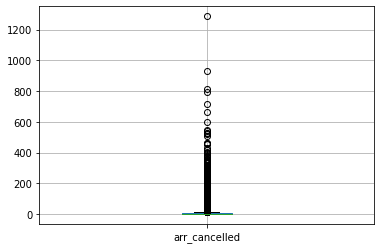

In [175]:
###################3
# DEAL WITH OUTLIERS
df.boxplot(column=['arr_cancelled'])

In [176]:
# Save cleaned data in new file for future use
df.to_csv('arrivals_2018-19_cleaned.csv', index=False)

### Data Manipulation

Questions to Answer:
 - Retrieve rows 200 to 204 from the dataframe
 - Airport with the most delays?
 - Identify the worst airport/airline service combination.
 - Display the number of diverted flights for each airport/airline pair
 - Average number of delays per airport 
 
holup 
 Airport with the most diverse number of airline carriers servicing them
 

In [177]:
# 1. Retrieve rows 200 to 204 from the dataframe (Slice)
# Note: for .iloc(), have to write 205 as the bound because indexing
# starts from 0
df.iloc[200:205]

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
200,2018-1,OH,PSA Airlines Inc.,LYH,"Lynchburg, VA: Lynchburg Regional/Preston Glen...",48.0,14.0,7.32,0.00,4.65,0.00,2.03,5.0,0.0,626.0,279.0,0.0,113.0,0.0,234.0
201,2018-1,OH,PSA Airlines Inc.,MCI,"Kansas City, MO: Kansas City International",31.0,4.0,1.59,0.00,1.53,0.00,0.88,1.0,0.0,103.0,56.0,0.0,25.0,0.0,22.0
202,2018-1,OH,PSA Airlines Inc.,MDT,"Harrisburg, PA: Harrisburg International",81.0,16.0,6.88,0.75,4.46,0.00,3.92,4.0,0.0,995.0,269.0,24.0,385.0,0.0,317.0
203,2018-1,OH,PSA Airlines Inc.,MEM,"Memphis, TN: Memphis International",138.0,24.0,9.78,0.49,3.46,0.78,9.49,6.0,0.0,1749.0,556.0,126.0,228.0,35.0,804.0
204,2018-1,OH,PSA Airlines Inc.,MGM,"Montgomery, AL: Montgomery Regional",62.0,20.0,5.39,0.00,4.14,0.00,10.48,5.0,0.0,1420.0,342.0,0.0,138.0,0.0,940.0


In [178]:
# selecting using label, can directly use 204
df.loc[200:204]

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
200,2018-1,OH,PSA Airlines Inc.,LYH,"Lynchburg, VA: Lynchburg Regional/Preston Glen...",48.0,14.0,7.32,0.00,4.65,0.00,2.03,5.0,0.0,626.0,279.0,0.0,113.0,0.0,234.0
201,2018-1,OH,PSA Airlines Inc.,MCI,"Kansas City, MO: Kansas City International",31.0,4.0,1.59,0.00,1.53,0.00,0.88,1.0,0.0,103.0,56.0,0.0,25.0,0.0,22.0
202,2018-1,OH,PSA Airlines Inc.,MDT,"Harrisburg, PA: Harrisburg International",81.0,16.0,6.88,0.75,4.46,0.00,3.92,4.0,0.0,995.0,269.0,24.0,385.0,0.0,317.0
203,2018-1,OH,PSA Airlines Inc.,MEM,"Memphis, TN: Memphis International",138.0,24.0,9.78,0.49,3.46,0.78,9.49,6.0,0.0,1749.0,556.0,126.0,228.0,35.0,804.0
204,2018-1,OH,PSA Airlines Inc.,MGM,"Montgomery, AL: Montgomery Regional",62.0,20.0,5.39,0.00,4.14,0.00,10.48,5.0,0.0,1420.0,342.0,0.0,138.0,0.0,940.0


In [184]:
#2. Airport with the most delays overall.
delays = 



#2c select all rows where number of __ exceeeds 5

#2d: Calculate loss of revenue If every 15 minutes of delay
# amounts to $30 loss

In [182]:
#3. Identify the worst airport/airline service combination.
# Sort by cancelled flights, then by delayed flights
worstServices = df.loc[:,['airport','carrier_name','arr_cancelled', 'arr_del15']]
worstServices.sort_values(by=['arr_cancelled', 'arr_del15'], ascending=False)

,airport,carrier_name,arr_cancelled,arr_del15
9258,CLT,PSA Airlines Inc.,1286.0,1747.0
27903,DFW,American Airlines Inc.,933.0,3574.0
41083,ORD,Envoy Air,815.0,1277.0
20716,MDW,Southwest Airlines Co.,793.0,904.0
27353,DFW,American Airlines Inc.,716.0,3714.0
...,...,...,...,...
40931,PVD,Allegiant Air,0.0,0.0
40958,TRI,Allegiant Air,0.0,0.0
41002,BTR,Envoy Air,0.0,0.0
41079,MSY,Envoy Air,0.0,0.0


In [186]:
#4. Using cross tabulation, display the number of diverted flights for each airport/airline pair
pd.crosstab(df['carrier'], df['airport'], values=df['arr_diverted'], aggfunc='sum').fillna('')

airport,ABE,ABI,ABQ,ABR,ABY,ACK,ACT,ACV,ACY,ADK,...,VEL,VLD,VPS,WRG,WYS,XNA,XWA,YAK,YNG,YUM
carrier,,,,,,,,,,,,,,,,,,,,,
9E,1.0,,,,3.0,3.0,,,,,...,,2.0,1.0,,,10.0,,,,
AA,,,8.0,,,,,,,,...,,,10.0,,,1.0,,,,
AS,,,0.0,,,,,,,0.0,...,,,,9.0,,,,23.0,,
B6,,,2.0,,,11.0,,,,,...,,,,,,,,,,
DL,3.0,,0.0,,,,,,,,...,,,9.0,,,3.0,,,,
EV,5.0,,3.0,,,,,,,,...,,,7.0,,,9.0,,,,
F9,,,0.0,,,,,,,,...,,,,,,0.0,,,,
G4,9.0,,0.0,,,,,,,,...,,,5.0,,,2.0,,,0.0,
HA,,,,,,,,,,,...,,,,,,,,,,


In [193]:
#5. Average number of delays per airport
totalDelays = df.groupby('airport')['arr_del15'].sum()
totalDelays.sort_values(by=['arr_del15'], ascending=False)

TypeError: sort_values() got an unexpected keyword argument 'by'

# Your Turn!

Spend the next 10-15 minutes and try to solve the following questions:

1. Retrieve rows 839 to 845 using .iloc() and .loc()
2. Update the number of cancelled flights for row 239 from 14 to 19.
3. Find the airline with the most cancelled flights in total. What about in percent?
4. List the top 5 carriers with the lowest number of delayed flights

In [194]:
df.loc[239]

date                                       2018-01
carrier                                         OH
carrier_name                     PSA Airlines Inc.
airport                                        TYS
airport_name           Knoxville, TN: McGhee Tyson
arr_flights                                  292.0
arr_del15                                     64.0
carrier_ct                                   26.23
weather_ct                                    2.58
nas_ct                                       10.42
security_ct                                    0.0
late_aircraft_ct                             24.77
arr_cancelled                                 14.0
arr_diverted                                   0.0
arr_delay                                   3435.0
carrier_delay                               1503.0
weather_delay                                 77.0
nas_delay                                    448.0
security_delay                                 0.0
late_aircraft_delay            

In [196]:
# Solutions
#1
df.at[239, 'arr_cancelled'] = 19
# df.loc[239]

date                                       2018-01
carrier                                         OH
carrier_name                     PSA Airlines Inc.
airport                                        TYS
airport_name           Knoxville, TN: McGhee Tyson
arr_flights                                  292.0
arr_del15                                     64.0
carrier_ct                                   26.23
weather_ct                                    2.58
nas_ct                                       10.42
security_ct                                    0.0
late_aircraft_ct                             24.77
arr_cancelled                                 19.0
arr_diverted                                   0.0
arr_delay                                   3435.0
carrier_delay                               1503.0
weather_delay                                 77.0
nas_delay                                    448.0
security_delay                                 0.0
late_aircraft_delay            